In [5]:
#1
!unzip -q "/content/test.v1i.yolov8.zip" -d "/content/human"


In [3]:
#2 install ultralytics and dependencies and check software and hardware
%pip install ultralytics
%pip install -U ultralytics albumentations

import ultralytics
ultralytics.checks()

Ultralytics 8.3.83 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 35.7/112.6 GB disk)


In [9]:
#3
!yolo train model=yolov8n.pt data='/content/human/data.yaml' epochs=20 imgsz=640 batch=10 momentum=0.9 weight_decay=0.0005 warmup_epochs=1  #lr0=0.001


100% 6.25M/6.25M [00:00<00:00, 111MB/s]
Ultralytics 8.3.83 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/human/data.yaml, epochs=20, time=None, patience=100, batch=10, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_

In [ ]:
!zip -r runs.zip runs
from google.colab import files
files.download("runs.zip")

#to downlaod runs.zip

  adding: runs/ (stored 0%)
  adding: runs/detect/ (stored 0%)
  adding: runs/detect/train/ (stored 0%)
  adding: runs/detect/train/results.png (deflated 8%)
  adding: runs/detect/train/labels.jpg (deflated 26%)
  adding: runs/detect/train/args.yaml (deflated 53%)
  adding: runs/detect/train/val_batch1_labels.jpg (deflated 7%)
  adding: runs/detect/train/val_batch2_labels.jpg (deflated 9%)
  adding: runs/detect/train/F1_curve.png (deflated 17%)
  adding: runs/detect/train/val_batch0_pred.jpg (deflated 12%)
  adding: runs/detect/train/train_batch1.jpg (deflated 8%)
  adding: runs/detect/train/R_curve.png (deflated 16%)
  adding: runs/detect/train/train_batch0.jpg (deflated 9%)
  adding: runs/detect/train/PR_curve.png (deflated 22%)
  adding: runs/detect/train/confusion_matrix.png (deflated 40%)
  adding: runs/detect/train/val_batch1_pred.jpg (deflated 7%)
  adding: runs/detect/train/val_batch0_labels.jpg (deflated 12%)
  adding: runs/detect/train/train_batch1121.jpg (deflated 20%)
  add

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
#4 Extra
#We can fine tuning our best.pt in bash
#Specifies the pre-trained weights and point to new data
#replace --data with --hyp (if we have a customised hyp data file)
'''
python train.py --weights runs/detect/train4/weights/best.pt --data new_data.yaml --epochs 20 --img 640
'''

#Retrain with partial layers
'''
!python train.py --weights runs/detect/train4/weights/best.pt --data /new_data.yaml --epochs 20 --img 640 --freeze 10
'''

#Layers in YOLO
'''
#Note
Retain the pre-trained features from earlier layers.
Fine-tuning on a new dataset but want to avoid overfitting by only training the later layers.
Layer Freezing in YOLOv5
Early Layers: Handle general feature extraction (e.g., edges, textures).
Middle Layers: Extract more complex features (e.g., shapes, patterns).
Later Layers: Focus on task-specific features (e.g., detecting logos)
'''

'''
#print model architecture and layer details, including layers and indices.
model = YOLO('runs/detect/train4/weights/best.pt')
print(model.model)


'''

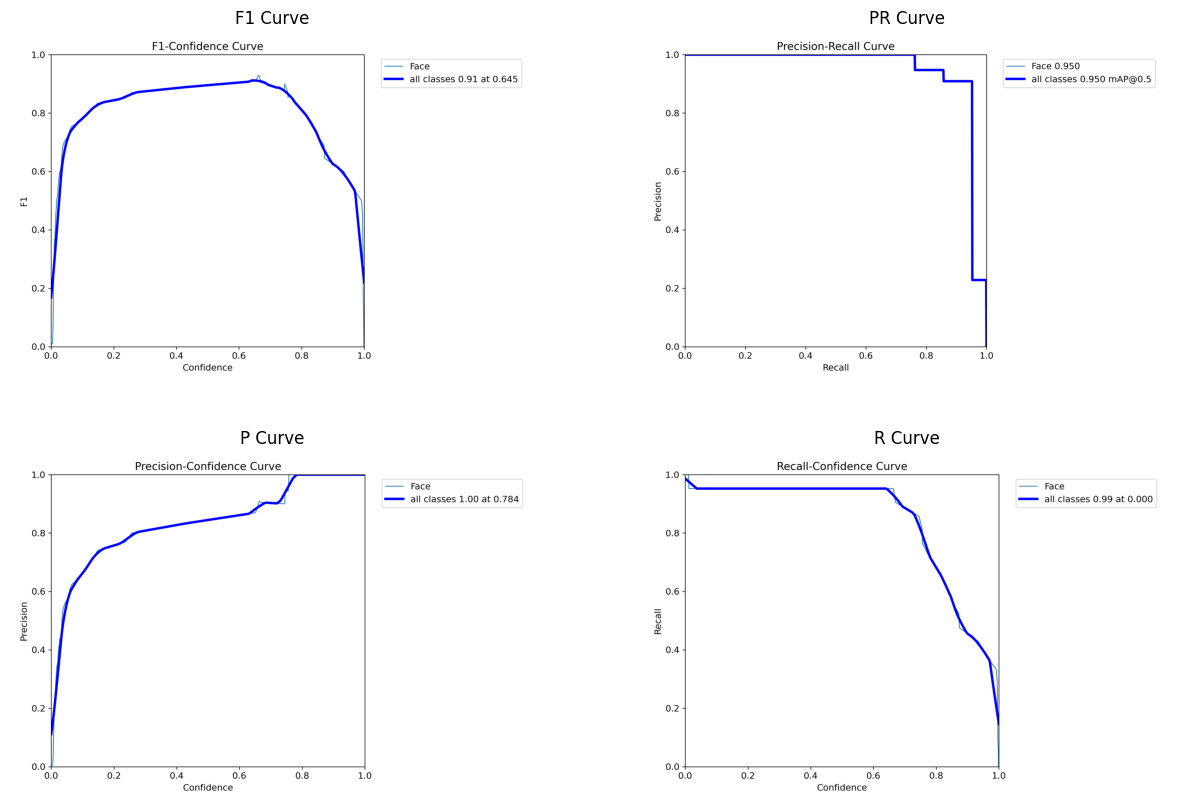

In [11]:
#4.Use matplotlib to display chart in output section
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

f1_curve = mpimg.imread('/content/runs/detect/train2/F1_curve.png')
pr_curve = mpimg.imread('/content/runs/detect/train2/PR_curve.png')
p_curve = mpimg.imread('/content/runs/detect/train2/P_curve.png')
r_curve = mpimg.imread('/content/runs/detect/train2/R_curve.png')
#labels = mpimg.imread('/content/runs/detect/train4/labels.jpg')

plt.figure(figsize=(15, 10))

# Display F1 Curve
plt.subplot(2, 2, 1)
plt.imshow(f1_curve)
plt.title('F1 Curve')
plt.axis('off')

# Display PR Curve
plt.subplot(2, 2, 2)
plt.imshow(pr_curve)
plt.title('PR Curve')
plt.axis('off')

# Display P Curve
plt.subplot(2, 2, 3)
plt.imshow(p_curve)
plt.title('P Curve')
plt.axis('off')

# Display R Curve
plt.subplot(2, 2, 4)
plt.imshow(r_curve)
plt.title('R Curve')
plt.axis('off')

'''
plt.subplot(3, 2, 5)
plt.imshow(labels)
plt.title('Labels')
plt.axis('off')
'''
plt.show()

"\ntrain_batch752_result = mpimg.imread('/content/runs/detect/train2/train_batch752.jpg')\nplt.figure(figsize=(15, 10))\nplt.subplot(2, 2,2)\nplt.imshow(train_batch752_result)\nplt.title('Train batch 752 result')\nplt.axis('off')\n"

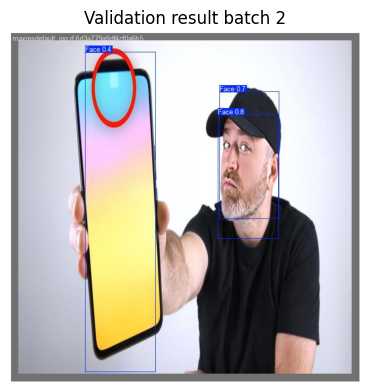

In [13]:
#5. Display validation result
validation_batch2_result = mpimg.imread('/content/runs/detect/train2/val_batch1_pred.jpg')
plt.figure(figsize=(15, 10))
plt.subplot(2, 2,1)
plt.imshow(validation_batch2_result)
plt.title('Validation result batch 2')
plt.axis('off')

'''
train_batch752_result = mpimg.imread('/content/runs/detect/train2/train_batch752.jpg')
plt.figure(figsize=(15, 10))
plt.subplot(2, 2,2)
plt.imshow(train_batch752_result)
plt.title('Train batch 752 result')
plt.axis('off')
'''

#Remark -- should I add a class 'Not AMD class'/'Old AMD class' to help model identify the Green colour logo? which is no longer use?
#       -- for cross out detection, how do I avoid? Should I add a new classes? Or just increase the batch size to train?